In [1]:
# Preparation
import matplotlib
from matplotlib import patches
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, mannwhitneyu
import numpy as np
import os
import pandas as pd
from pathlib import Path
import seaborn as sns

from src.fitness_landscape import *
from src.time_series_generation import *

cmap = plt.get_cmap('tab10')
sns.set_style("ticks")
sns.set_style({"xtick.direction": "in", "ytick.direction": "in"})
matplotlib.rcParams.update({'font.size': 14})
matplotlib.rcParams.update({'axes.labelsize': 16})
matplotlib.rcParams.update({'legend.fontsize': 16})
matplotlib.rcParams.update({'xtick.labelsize': 16, 'ytick.labelsize': 16})

os.makedirs('./plots', exist_ok=True)
save_path = Path('./plots')
env_list = pd.read_excel('./data/strain_num_matching.xlsx', index_col=0)

# Figure 1

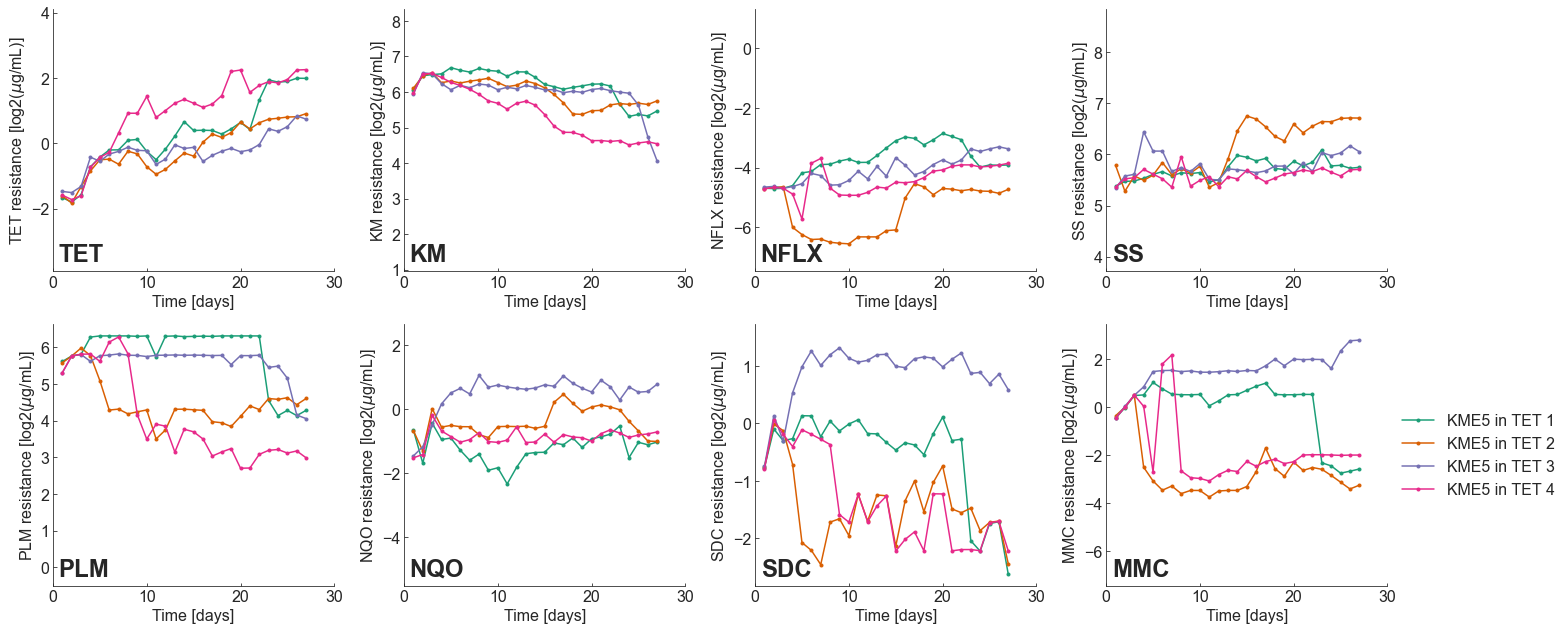

In [2]:
# Fig. 1 Laboratory evolution of Escherichia coli to probe evolutionary trajectories in a multi-dimensional resistance space
cmap2 = plt.get_cmap("Dark2")

# set parent resistance to day 0 data, and use relative resistance from Maeda 2020.
# find parent strains
parent_bool = strain_name_df['strain_env'].str.contains('Parent').values
# output index for parent strains
parent_index = strain_name_df.iloc[parent_bool].index.values

day0_ic50 = pd.DataFrame(index=stress_list)
day = 0
for strain in parent_index:
    df = pd.read_csv('./data/trajectories/strain' + str(strain) + '.csv',
                     index_col=0)
    day0_ic50['strain' + str(strain)] = df.iloc[:, day]
day0_mean = day0_ic50.mean(axis=1)

parent_ic50 = day0_mean

left, bottom = .02, .02  # parameters for locating stress names in the plot
top = .88
num_strains = 4

for start_strain in range(9, 13, 4):
    plt.subplots(2, 4, figsize=(22, 9))

    for j, stress in enumerate(stress_list):
        ax = plt.subplot(2, 4, j + 1)

        for strain in range(1, 61):
            # environment and evolved strain
            plot_time_series(strain,
                             stress,
                             color=cmap(7),
                             marker='',
                             alpha=0,
                             print_title=False)

        for i, strain in enumerate(
                range(start_strain, start_strain + num_strains)):
            plot_time_series(strain,
                             stress,
                             color=cmap2(i),
                             zorder=3,
                             alpha=1,
                             i=i,
                             print_title=False,
                             label='KME5 in TET ' + str(i + 1))

        # get IC50 value from Maeda et al 2020.
        strain_env = strain_name_df.iloc[strain - 1, 0]
        strain_name_len = strain_env.find('in') - 1
        strain_name = strain_env[:strain_name_len]
        if strain_name == 'Parent':
            ic50_value = parent_ic50[stress]
        else:
            ic50_value = evo192_res.loc[strain_name][stress] + \
                parent_ic50[stress]
        std = day0_ic50.std(axis=1)[stress]

        plt.xlim(0, 30)
        plt.ylabel(stress + ' resistance [log2($\mu$g/mL)]')
        plt.xlabel('Time [days]')

        ax.text(left,
                bottom,
                stress,
                horizontalalignment='left',
                verticalalignment='bottom',
                transform=ax.transAxes,
                fontsize=24,
                fontweight='bold')
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)

        if j == 7:
            plt.legend(loc='center left',
                       bbox_to_anchor=(1, 0.5),
                       frameon=False)
    plt.tight_layout()
    #plt.savefig(str(save_path / "Fig1.pdf"), dpi=300, bbox_inches="tight")
    plt.show()

# Figure 2

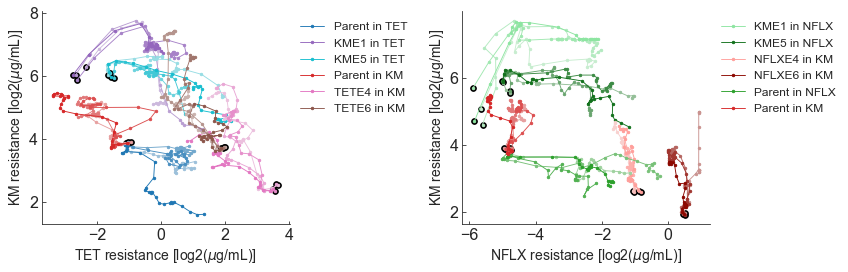

In [3]:
# Fig. 2. Evolutionary trajectories in two-dimensional drug resistance space
roll_win = 3
alph = 0.2
matplotlib.rcParams.update({'legend.fontsize': 12})

sns_theme = "tab10"
c_parent_tet = "light:" + sns.color_palette(sns_theme).as_hex()[0]
c_km1_tet = "light:" + sns.color_palette(sns_theme).as_hex()[4]
c_km5_tet = 'light:' + sns.color_palette(sns_theme).as_hex()[9]
c_parent_km = "light:" + sns.color_palette(sns_theme).as_hex()[3]
c_tet4_km = "light:" + sns.color_palette(sns_theme).as_hex()[6]
c_tet6_km = "light:" + sns.color_palette(sns_theme).as_hex()[5]

plt.subplots(1, 2, figsize=(12, 4))

ax1 = plt.subplot(1, 2, 1)
stress1 = 'TET'
stress2 = 'KM'

df = pd.read_csv('./data/trajectories/strain1.csv', index_col=0)
plot_strain(1,
            4,
            stress1,
            stress2,
            'Parent in TET',
            roll_win=roll_win,
            cmap_name=c_parent_tet)
plot_strain(5,
            8,
            stress1,
            stress2,
            'KME1 in TET',
            roll_win=roll_win,
            cmap_name=c_km1_tet)
plot_strain(9,
            12,
            stress1,
            stress2,
            'KME5 in TET',
            roll_win=roll_win,
            cmap_name=c_km5_tet)
plot_strain(13,
            16,
            stress1,
            stress2,
            'Parent in KM',
            roll_win=roll_win,
            cmap_name=c_parent_km)
plot_strain(17,
            20,
            stress1,
            stress2,
            'TETE4 in KM',
            roll_win=roll_win,
            cmap_name=c_tet4_km)
plot_strain(21,
            24,
            stress1,
            stress2,
            'TETE6 in KM',
            roll_win=roll_win,
            cmap_name=c_tet6_km)

plt.xlabel(stress1 + ' resistance [log2($\mu$g/mL)]', fontsize=14)
plt.ylabel(stress2 + ' resistance [log2($\mu$g/mL)]', fontsize=14)
plt.legend(frameon=False, bbox_to_anchor=(1., 1))
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

ax2 = plt.subplot(1, 2, 2)
stress1 = 'NFLX'
stress2 = 'KM'
sns_theme1 = "tab10"
sns_theme2 = "pastel"
sns_theme3 = "dark"
c_km1_nflx = "light:" + sns.color_palette(sns_theme2).as_hex()[2]
c_km5_nflx = "light:" + sns.color_palette(sns_theme3).as_hex()[2]
c_nflx4_km = "light:" + sns.color_palette(sns_theme2).as_hex()[3]
c_nflx6_km = "light:" + sns.color_palette(sns_theme3).as_hex()[3]
c_parent_nflx = "light:" + sns.color_palette(sns_theme1).as_hex()[2]
c_parent_km = "light:" + sns.color_palette(sns_theme1).as_hex()[3]

df = pd.read_csv('./data/trajectories/strain1.csv', index_col=0)
plot_strain(37, 40, stress1, stress2, 'KME1 in NFLX',
            roll_win=roll_win, cmap_name=c_km1_nflx)
plot_strain(41, 44, stress1, stress2, 'KME5 in NFLX',
            roll_win=roll_win, cmap_name=c_km5_nflx)
plot_strain(25, 28, stress1, stress2, 'NFLXE4 in KM',
            roll_win=roll_win, cmap_name=c_nflx4_km)
plot_strain(29, 32, stress1, stress2, 'NFLXE6 in KM',
            roll_win=roll_win, cmap_name=c_nflx6_km)
plot_strain(33, 36, stress1, stress2, 'Parent in NFLX',
            roll_win=roll_win, cmap_name=c_parent_nflx)
plot_strain(13, 16, stress1, stress2, 'Parent in KM',
            roll_win=roll_win, cmap_name=c_parent_km)

plt.xlabel(stress1 + ' resistance [log2($\mu$g/mL)]', fontsize=14)
plt.ylabel(stress2 + ' resistance [log2($\mu$g/mL)]', fontsize=14)
plt.legend(frameon=False, bbox_to_anchor=(1., 1))
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)

plt.tight_layout()
#plt.savefig(str(save_path / "Fig2.pdf"), dpi=300, bbox_inches="tight")

# Figure 3

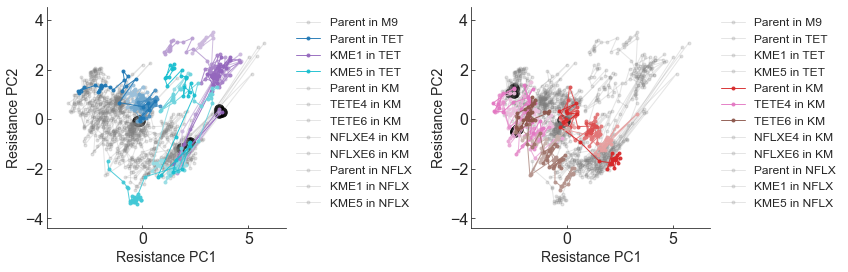

In [4]:
# Fig. 3-1. Evolutionary trajectories in two-dimensional PCA space
roll_win = 3
alph = 0.2
matplotlib.rcParams.update({'legend.fontsize': 12})

sns_theme = "tab10"
c_parent_tet = "light:" + sns.color_palette(sns_theme).as_hex()[0]
c_km1_tet = "light:" + sns.color_palette(sns_theme).as_hex()[4]
c_km5_tet = 'light:' + sns.color_palette(sns_theme).as_hex()[9]
c_parent_km = "light:" + sns.color_palette(sns_theme).as_hex()[3]
c_tet4_km = "light:" + sns.color_palette(sns_theme).as_hex()[6]
c_tet6_km = "light:" + sns.color_palette(sns_theme).as_hex()[5]

plt.subplots(1, 2, figsize=(12, 4))

ax3 = plt.subplot(1, 2, 1)
traj_pca_df = pd.DataFrame()
traj_pca_df = plot_pca_traj('Parent in M9',
                            traj_pca_df=traj_pca_df,
                            c="gray",
                            alpha=alph)
traj_pca_df = plot_pca_traj('Parent in TET',
                            traj_pca_df=traj_pca_df,
                            c=c_parent_tet,
                            zorder=3)
traj_pca_df = plot_pca_traj('KME1 in TET',
                            traj_pca_df=traj_pca_df,
                            c=c_km1_tet,
                            zorder=3)
traj_pca_df = plot_pca_traj('KME5 in TET',
                            traj_pca_df=traj_pca_df,
                            c=c_km5_tet,
                            zorder=3)
traj_pca_df = plot_pca_traj('Parent in KM',
                            traj_pca_df=traj_pca_df,
                            c="gray",
                            alpha=alph)
traj_pca_df = plot_pca_traj('TETE4 in KM',
                            traj_pca_df=traj_pca_df,
                            c="gray",
                            alpha=alph)
traj_pca_df = plot_pca_traj('TETE6 in KM',
                            traj_pca_df=traj_pca_df,
                            c="gray",
                            alpha=alph)
traj_pca_df = plot_pca_traj('NFLXE4 in KM',
                            traj_pca_df=traj_pca_df,
                            c="gray",
                            alpha=alph)
traj_pca_df = plot_pca_traj('NFLXE6 in KM',
                            traj_pca_df=traj_pca_df,
                            c="gray",
                            alpha=alph)
traj_pca_df = plot_pca_traj('Parent in NFLX',
                            traj_pca_df=traj_pca_df,
                            c="gray",
                            alpha=alph)
traj_pca_df = plot_pca_traj('KME1 in NFLX',
                            traj_pca_df=traj_pca_df,
                            c="gray",
                            alpha=alph)
traj_pca_df = plot_pca_traj('KME5 in NFLX',
                            traj_pca_df=traj_pca_df,
                            c="gray",
                            alpha=alph)
plt.xlim(traj_pca_df.iloc[:, 0].min() - 1, traj_pca_df.iloc[:, 0].max() + 1)
plt.ylim(traj_pca_df.iloc[:, 1].min() - 1, traj_pca_df.iloc[:, 1].max() + 1)
plt.xlabel('Resistance PC1', fontsize=14)
plt.ylabel('Resistance PC2', fontsize=14)
plt.legend(frameon=False, bbox_to_anchor=(1., 1))
ax3.spines['right'].set_visible(False)
ax3.spines['top'].set_visible(False)

ax4 = plt.subplot(1, 2, 2)
traj_pca_df = pd.DataFrame()
traj_pca_df = plot_pca_traj('Parent in M9',
                            traj_pca_df=traj_pca_df,
                            c="gray",
                            alpha=alph)
traj_pca_df = plot_pca_traj('Parent in TET',
                            traj_pca_df=traj_pca_df,
                            c="gray",
                            alpha=alph)
traj_pca_df = plot_pca_traj('KME1 in TET',
                            traj_pca_df=traj_pca_df,
                            c="gray",
                            alpha=alph)
traj_pca_df = plot_pca_traj('KME5 in TET',
                            traj_pca_df=traj_pca_df,
                            c="gray",
                            alpha=alph)
traj_pca_df = plot_pca_traj('Parent in KM',
                            traj_pca_df=traj_pca_df,
                            c=c_parent_km,
                            zorder=3)
traj_pca_df = plot_pca_traj('TETE4 in KM',
                            traj_pca_df=traj_pca_df,
                            c=c_tet4_km,
                            zorder=3)
traj_pca_df = plot_pca_traj('TETE6 in KM',
                            traj_pca_df=traj_pca_df,
                            c=c_tet6_km,
                            zorder=3)
traj_pca_df = plot_pca_traj('NFLXE4 in KM',
                            traj_pca_df=traj_pca_df,
                            c="gray",
                            alpha=alph)
traj_pca_df = plot_pca_traj('NFLXE6 in KM',
                            traj_pca_df=traj_pca_df,
                            c="gray",
                            alpha=alph)
traj_pca_df = plot_pca_traj('Parent in NFLX',
                            traj_pca_df=traj_pca_df,
                            c="gray",
                            alpha=alph)
traj_pca_df = plot_pca_traj('KME1 in NFLX',
                            traj_pca_df=traj_pca_df,
                            c="gray",
                            alpha=alph)
traj_pca_df = plot_pca_traj('KME5 in NFLX',
                            traj_pca_df=traj_pca_df,
                            c="gray",
                            alpha=alph)
plt.xlim(traj_pca_df.iloc[:, 0].min() - 1, traj_pca_df.iloc[:, 0].max() + 1)
plt.ylim(traj_pca_df.iloc[:, 1].min() - 1, traj_pca_df.iloc[:, 1].max() + 1)
plt.xlabel('Resistance PC1', fontsize=14)
plt.ylabel('Resistance PC2', fontsize=14)
plt.legend(frameon=False, bbox_to_anchor=(1., 1))
ax4.spines['right'].set_visible(False)
ax4.spines['top'].set_visible(False)

plt.tight_layout()
#plt.savefig(str(save_path / "Fig3-1.pdf"), dpi=300, bbox_inches="tight")

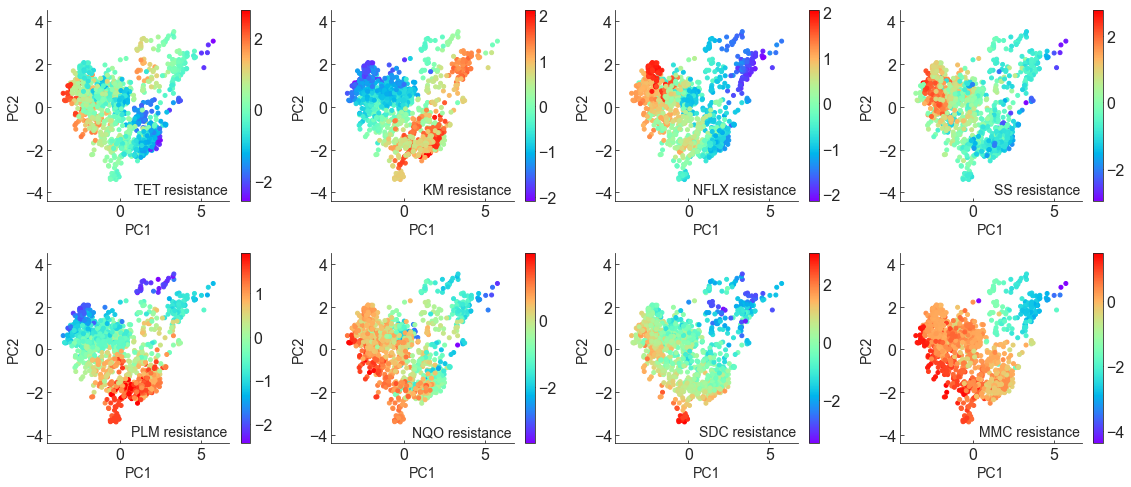

In [5]:
# Fig. 3-2

plt.subplots(2, 4, figsize=(16, 7))
right, bottom = .99, .02

for i in range(8):
    ax = plt.subplot(2, 4, i+1)
    tet_km = full_df.iloc[:, i].values
    plt.scatter(pca_full_df[:, 0], pca_full_df[:, 1],
                c=tet_km, zorder=3, cmap='rainbow', s=16)

    plt.xlim(pca_full_df[:, 0].min()-1, pca_full_df[:, 0].max()+1)
    plt.ylim(pca_full_df[:, 1].min()-1, pca_full_df[:, 1].max()+1)
    plt.xlabel('PC1', fontsize=14)
    plt.ylabel('PC2', fontsize=14)
    plt.colorbar()
    ax.text(right,
            bottom,
            f"{stress_list[i]} resistance",
            horizontalalignment='right',
            verticalalignment='bottom',
            transform=ax.transAxes,
            fontsize=14,
            fontweight='normal')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

plt.tight_layout()
#plt.savefig(str(save_path / "Fig3-2.pdf"), dpi=300, bbox_inches='tight')
plt.show()

# Figure 4

<ipython-input-6-69a696eea09e>:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(3, 3, 9).remove()


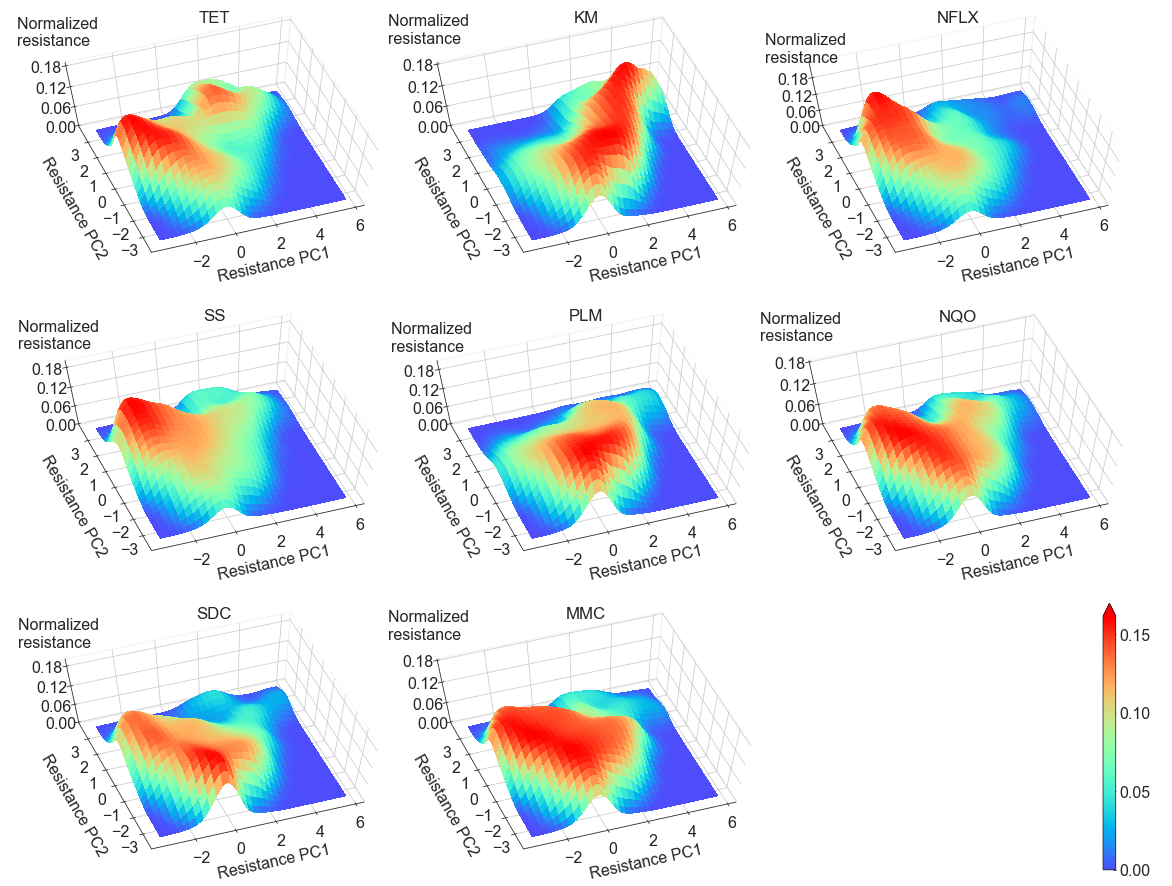

In [6]:
# Fig. 4-1 Estimated phenotype-fitness landscape

h = 0.9  # bandwidth decided by cross validation
colormap = plt.get_cmap('rainbow', 256)
colormap = truncate_colormap(colormap, 0.1, 1, 256)
high_res = False
if high_res:
    stride = 30
    res = 1000  # resolution
else:
    stride = 10
    res = 300  # resolution

z_max_store = []

plt.subplots(3, 3, figsize=(15, 11))
for stress_index in range(8):
    fitness, ave_quantized = quantize_map(stress_index=stress_index,
                                          grid_size=grid_size)
    nonnan_loc = np.argwhere(~np.isnan(ave_quantized))

    rel_fit = ave_quantized - np.nanmin(ave_quantized)
    rel_fit = [
        rel_fit[nonnan_loc[i][0], nonnan_loc[i][1]]
        for i in range(nonnan_loc.shape[0])
    ]
    mu1 = nonnan_loc[:, 1]
    mu2 = nonnan_loc[:, 0]

    # convert parameters to units of the PCA space
    Mu1 = mu1 * grid_size + x_min
    Mu2 = mu2 * grid_size + y_min
    H = h * grid_size

    X = np.linspace(x_min, x_max, res)
    Y = np.linspace(y_min, y_max, res)
    XX, YY = np.meshgrid(X, Y, sparse=True)
    Z = fitted_2d_func(XX, YY, Mu1, Mu2, H, H, rel_fit)

    ax = plt.subplot(3, 3, stress_index + 1, projection='3d')
    im = ax.plot_surface(XX,
                         YY,
                         Z,
                         cmap=colormap,
                         linewidth=0,
                         cstride=stride,
                         rstride=stride,
                         antialiased=False,
                         shade=True,
                         clim=(0, Z.max()),
                         vmin=0.)

    z_max_store.append(Z.max())
    plt.title(stress_list[stress_index])
    ax.view_init(66, 250)
    ax.xaxis.pane.fill = False
    ax.yaxis.pane.fill = False
    ax.zaxis.pane.fill = False
    ax.set_xlabel('Resistance PC1', linespacing=1)
    ax.set_ylabel('Resistance PC2')
    ax.zaxis.set_rotate_label(False)
    ax.text(-6, 4.4, 0.24, s='Normalized \nresistance', fontsize=16)
    ax.set_zticks(np.linspace(0, 0.18, 4))
    ax.xaxis.labelpad = 15
    ax.yaxis.labelpad = 15

    if stress_index == 7:
        ax = plt.subplot(3, 3, 9)
        im = ax.imshow(np.random.rand(3, 3),
                       clim=(0, np.min(np.array(z_max_store))),
                       cmap=colormap,
                       vmin=0.)
        plt.colorbar(
            im,
            extend='max',
            panchor=(-1, 0.5),
            ticks=np.linspace(0, 0.15, 4),
            norm=matplotlib.colors.Normalize(vmin=0.,
                                             vmax=np.min(
                                                 np.array(z_max_store))),
        )

plt.subplot(3, 3, 9).remove()
plt.tight_layout(pad=-3, h_pad=2.0)
#plt.savefig(str(save_path / "Fig4-1.pdf"), dpi=300, bbox_inches="tight")

<Figure size 288x288 with 0 Axes>

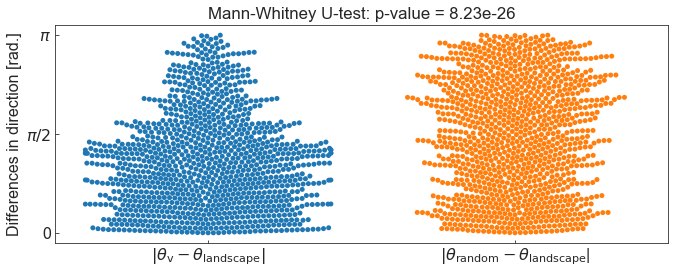

In [7]:
# Fig. 4-2
np.random.seed(42)

roll_win = 6
cm = sns.color_palette("deep", as_cmap=True)
x1, x2, y1, y2 = (-4, x_max, -4, 4)
res = 1000  # resolution
X = np.linspace(x1, x2, res)
Y = np.linspace(y1, y2, res)
XX, YY = np.meshgrid(X, Y, sparse=True)

stress_indices = [0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2]
strain_names = [
    'Parent in TET', 'KME1 in TET', 'KME5 in TET', 'Parent in KM',
    'TETE4 in KM', 'TETE6 in KM', 'NFLXE4 in KM', 'NFLXE6 in KM',
    'Parent in NFLX', 'KME1 in NFLX', 'KME5 in NFLX'
]
inner_prods = []
labels = []
rand_prods = []
grad_sizes = []

theta_v = []
theta_landscape = []

plt.figure(figsize=(4, 4))
for stress_index, strain_name in zip(stress_indices, strain_names):
    traj_pca_df = pd.DataFrame()

    l_params = landscape_props(stress_index)
    Mu1, Mu2, H, rel_fit = l_params
    Z = fitted_2d_func(XX, YY, Mu1, Mu2, H, H, rel_fit)

    # `traj_pca_df` containds a concatenated dataframe of 4 copy strains
    traj_pca_df = plot_pca_traj2(strain_name,
                                 traj_pca_df=traj_pca_df,
                                 cmap=cm,
                                 start_time=0,
                                 alpha=1,
                                 plot=False,
                                 roll_win=roll_win)

    if strain_name == 'NFLXE4 in KM':
        # Only 14 days for #2 (strain26) in `NFLXE4 in KM`
        traj1 = traj_pca_df.iloc[:27, :2].values
        traj2 = traj_pca_df.iloc[27:41, :2].values
        traj3 = traj_pca_df.iloc[41:68, :2].values
        traj4 = traj_pca_df.iloc[68:95, :2].values
    else:
        traj1 = traj_pca_df.iloc[:27, :2].values
        traj2 = traj_pca_df.iloc[27:54, :2].values
        traj3 = traj_pca_df.iloc[54:81, :2].values
        traj4 = traj_pca_df.iloc[81:108, :2].values

    for i in range(1, 5):
        # normalized velocities at each time point
        traj_diff = np.diff(eval('traj' + str(i)), axis=0)
        traj_diff_norm = traj_diff / \
            np.linalg.norm(traj_diff, axis=1).reshape(-1, 1)
        theta1 = np.arctan2(traj_diff_norm[:, 1], traj_diff_norm[:, 0])
        theta_v.extend(list(theta1))

        # normalized gradients generated by each corresponding point in the fitness landscape
        grad_ = np.empty((traj_diff.shape[0], 2))
        for day in range(traj_diff.shape[0]):
            grad_[day, :] = wrap_grad(
                eval('traj' + str(i))[day, :], Mu1, Mu2, H, rel_fit)
        grad_norm = grad_ / np.linalg.norm(grad_, axis=1).reshape(-1, 1)
        theta2 = np.arctan2(grad_norm[:, 1], grad_norm[:, 0])
        theta_landscape.extend(list(theta2))

        inner_prod = grad_norm[:,
                               0] * traj_diff_norm[:,
                                                   0] + grad_norm[:,
                                                                  1] * traj_diff_norm[:,
                                                                                      1]
        inner_prods.extend(inner_prod)
        grad_sizes.extend(np.linalg.norm(grad_, axis=1))
        labels.extend([strain_name] * traj_diff.shape[0])

        rand_thetas = 2 * np.pi * np.random.rand(traj_diff.shape[0])
        rand_prod = np.cos(rand_thetas) * traj_diff_norm[:, 0] + np.sin(
            rand_thetas) * traj_diff_norm[:, 1]
        rand_prods.extend(rand_prod)

df = pd.DataFrame({
    'Inner_products': inner_prods,
    'Random': rand_prods,
    'grad_size': grad_sizes
})
        

# fig 5.13 d
def fix_periodic(x):
    """fix the effect of the periodic boundary for array x."""
    x[np.where(x > np.pi)] = np.abs(2 * np.pi - x[np.where(x > np.pi)])
    return x


theta_v = np.array(theta_v)
theta_landscape = np.array(theta_landscape)
rand_theta = 2 * np.pi * np.random.rand(theta_v.shape[0])

delta_theta = np.abs(theta_v - theta_landscape)
delta_theta = fix_periodic(delta_theta)

delta_theta_rand = np.abs(rand_theta - theta_landscape)
delta_theta_rand = fix_periodic(delta_theta_rand)

labels = []
labels.extend(['0'] * delta_theta.shape[0])
labels.extend(['1'] * delta_theta_rand.shape[0])

values = []
values.extend(list(delta_theta))
values.extend(list(delta_theta_rand))

data_df = pd.DataFrame({'labels': labels, 'values': values})

statistic, pvalue = mannwhitneyu(inner_prods,
                                 rand_prods,
                                 use_continuity=False,
                                 alternative='greater')

plt.figure(figsize=(11, 4))
sns.swarmplot(x='labels', y='values', data=data_df)

boxplot = False
if boxplot:
    ax = sns.boxplot(x='labels', y='values', data=data_df, width=0.3)
    # iterate over boxes
    for i, box in enumerate(ax.artists):
        box.set_edgecolor('black')
        box.set_facecolor('white')

        # iterate over whiskers and median lines
        for j in range(6 * i, 6 * (i + 1)):
            ax.lines[j].set_color('black')

plt.ylabel('Differences in direction [rad.]')
plt.yticks([0, np.pi / 2, np.pi], ['0', r'$\pi/2$', r'$\pi$'])
plt.xticks(np.arange(2), [
    r'$|\theta_\mathrm{v} - \theta_\mathrm{landscape}|$',
    r'$|\theta_\mathrm{random} - \theta_\mathrm{landscape}$|'
])
plt.title('Mann-Whitney U-test: p-value = ' + '{:.2e}'.format(pvalue))
plt.xlabel('')
# plt.savefig(str(save_path / "fig4-2.pdf"), dpi=400, bbox_inches='tight')
plt.show()

# Figure 5

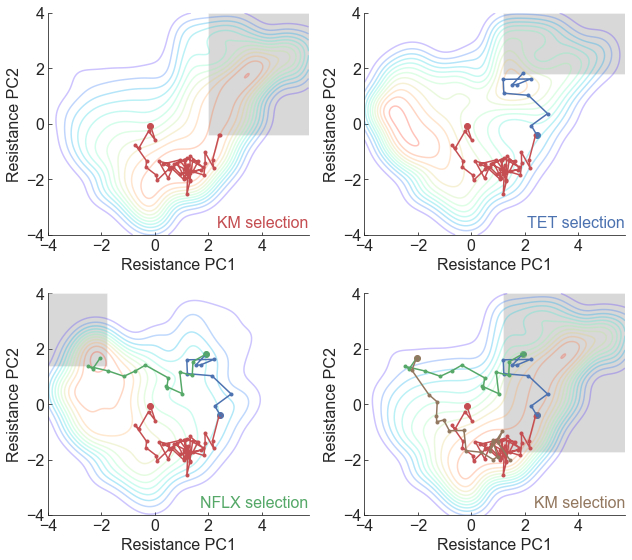

In [8]:
# Fig. 5. Simulating an evolutionary trajectory based on the reconstructed fitness landscape
seed = 124
np.random.seed(seed)  # nice seeds: 118, 124

max_steps = 200
eta = 0.4
noise_strength = 0.3
num_runs = 10
cm = sns.color_palette("deep", as_cmap=True)

x1, x2, y1, y2 = (-4, x_max, -4, 4)
res = 1000  # resolution for drawing the landscape
X = np.linspace(x1, x2, res)
Y = np.linspace(y1, y2, res)
XX, YY = np.meshgrid(X, Y, sparse=True)

plt.subplots(2, 2, figsize=(9, 8))

stress_index = 1  # KM environment
l_params = landscape_props(stress_index)
Mu1, Mu2, H, rel_fit = l_params
Z_KM = fitted_2d_func(XX, YY, Mu1, Mu2, H, H, rel_fit)

# generate a trajectory statrting from the state of the Parent strain.
parent_state = get_init_state('Parent in KM').mean(axis=0)
traj = grad_ascent(wrap_grad,
                   parent_state,
                   stress_index,
                   l_params,
                   n_epochs=1,
                   eta=eta,
                   noise_strength=noise_strength)

x_thre1 = 2
y_thre1 = -0.4
for step in range(max_steps):
    # new_traj: np.array([init_state, next_state]) # shape = (2,2)
    new_traj = grad_ascent(wrap_grad,
                           traj[-1, :],
                           stress_index,
                           l_params,
                           n_epochs=1,
                           eta=eta,
                           noise_strength=noise_strength)
    traj = np.append(traj, new_traj[-1, :].reshape(1, 2), axis=0)

    if (traj[-1, 0] > x_thre1) and (traj[-1, 1] > y_thre1):
        KM_steps = traj.shape[0]
        break

ax = plt.subplot(2, 2, 1)
plot_traj(traj[:KM_steps, :], color=cm[3], alpha=1)
plt.contour(X,
            Y,
            Z_KM,
            levels=13,
            cmap=plt.get_cmap('rainbow', 256),
            alpha=0.3)
r = patches.Rectangle(xy=(x_thre1, y_thre1),
                      width=x2 - x_thre1,
                      height=y2 - y_thre1,
                      fc='gray',
                      alpha=0.3)
ax.add_patch(r)
plt.xlabel('Resistance PC1')
plt.ylabel('Resistance PC2')
plt.xlim(x1, x2)
plt.ylim(y1, y2)
plt.text(x=1,
         y=0.02,
         s='KM selection',
         color=cm[3],
         verticalalignment="bottom",
         horizontalalignment='right',
         transform=ax.transAxes,
         fontsize=16)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

stress_index = 0  # TET environment
l_params = landscape_props(stress_index)
Mu1, Mu2, H, rel_fit = l_params
Z_TET = fitted_2d_func(XX, YY, Mu1, Mu2, H, H, rel_fit)

x_thre2 = 1.2
y_thre2 = 1.8
for step in range(max_steps):
    # new_traj: np.array([init_state, next_state]) # shape = (2,2)
    new_traj = grad_ascent(wrap_grad,
                           traj[-1, :],
                           stress_index,
                           l_params,
                           n_epochs=1,
                           eta=eta,
                           noise_strength=noise_strength)
    traj = np.append(traj, new_traj[-1, :].reshape(1, 2), axis=0)

    if (traj[-1, 0] > x_thre2) and (traj[-1, 1] > y_thre2):
        TET_steps = traj.shape[0] - KM_steps
        break

ax = plt.subplot(2, 2, 2)
plot_traj(traj[:KM_steps, :], color=cm[3], alpha=1)
plot_traj(traj[KM_steps - 1:, :], color=cm[0], alpha=1)
plt.contour(X,
            Y,
            Z_TET,
            levels=13,
            cmap=plt.get_cmap('rainbow', 256),
            alpha=0.3)
r = patches.Rectangle(xy=(x_thre2, y_thre2),
                      width=x2 - x_thre2,
                      height=y2 - y_thre2,
                      fc='gray',
                      alpha=0.3)
ax.add_patch(r)
plt.xlabel('Resistance PC1')
plt.ylabel('Resistance PC2')
plt.xlim(x1, x2)
plt.ylim(y1, y2)
plt.text(x=1,
         y=0.02,
         s='TET selection',
         color=cm[0],
         verticalalignment="bottom",
         horizontalalignment='right',
         transform=ax.transAxes,
         fontsize=16)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

stress_index = 2  # NFLX environment
l_params = landscape_props(stress_index)
Mu1, Mu2, H, rel_fit = l_params
Z_NFLX = fitted_2d_func(XX, YY, Mu1, Mu2, H, H, rel_fit)

x_thre3 = -1.8
y_thre3 = 1.4
for step in range(max_steps):
    # new_traj: np.array([init_state, next_state]) # shape = (2,2)
    new_traj = grad_ascent(wrap_grad,
                           traj[-1, :],
                           stress_index,
                           l_params,
                           n_epochs=1,
                           eta=eta,
                           noise_strength=noise_strength)
    traj = np.append(traj, new_traj[-1, :].reshape(1, 2), axis=0)
    if (traj[-1, 0] < x_thre3) and (traj[-1, 1] > y_thre3):
        NFLX_steps = traj.shape[0] - KM_steps - TET_steps
        break

ax = plt.subplot(2, 2, 3)
plot_traj(traj[:KM_steps, :], color=cm[3], alpha=1)
plot_traj(traj[KM_steps - 1:KM_steps + TET_steps, :], color=cm[0], alpha=1)
plot_traj(traj[KM_steps + TET_steps - 1:, :], color=cm[2], alpha=1)
plt.contour(X,
            Y,
            Z_NFLX,
            levels=13,
            cmap=plt.get_cmap('rainbow', 256),
            alpha=0.3)
r = patches.Rectangle(xy=(x1, y_thre3),
                      width=x_thre3 - x1,
                      height=y2 - y_thre3,
                      fc='gray',
                      alpha=0.3)
ax.add_patch(r)
plt.xlabel('Resistance PC1')
plt.ylabel('Resistance PC2')
plt.xlim(x1, x2)
plt.ylim(y1, y2)
plt.text(x=1,
         y=0.02,
         s='NFLX selection',
         color=cm[2],
         verticalalignment="bottom",
         horizontalalignment='right',
         transform=ax.transAxes,
         fontsize=16)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

stress_index = 1  # KM environment
l_params = landscape_props(stress_index)
Mu1, Mu2, H, rel_fit = l_params
Z = fitted_2d_func(XX, YY, Mu1, Mu2, H, H, rel_fit)
x_thre4 = 1.2
y_thre4 = -1.7

for step in range(max_steps):
    # new_traj: np.array([init_state, next_state]) # shape = (2,2)
    new_traj = grad_ascent(wrap_grad,
                           traj[-1, :],
                           stress_index,
                           l_params,
                           n_epochs=1,
                           eta=eta,
                           noise_strength=noise_strength)
    traj = np.append(traj, new_traj[-1, :].reshape(1, 2), axis=0)
    if (traj[-1, 0] > x_thre4) and (traj[-1, 1] < y_thre4):
        KM_steps2 = traj.shape[0] - KM_steps - TET_steps - NFLX_steps
        break

ax = plt.subplot(2, 2, 4)
plot_traj(traj[:KM_steps, :], color=cm[3], alpha=1)
plot_traj(traj[KM_steps - 1:KM_steps + TET_steps, :], color=cm[0], alpha=1)
plot_traj(traj[KM_steps + TET_steps - 1:KM_steps + TET_steps + NFLX_steps, :],
          color=cm[2],
          alpha=1)
plot_traj(traj[KM_steps + TET_steps + NFLX_steps - 1:, :],
          color=cm[5],
          alpha=1)
plt.contour(X, Y, Z, levels=13, cmap=plt.get_cmap('rainbow', 256), alpha=0.3)
r4 = patches.Rectangle(xy=(x_thre4, y_thre4),
                       width=x2 - x_thre4,
                       height=y2 - y_thre4,
                       fc='gray',
                       alpha=0.3)
ax.add_patch(r4)
plt.xlabel('Resistance PC1')
plt.ylabel('Resistance PC2')
plt.xlim(x1, x2)
plt.ylim(y1, y2)
plt.text(x=1,
         y=0.02,
         s='KM selection',
         color=cm[5],
         verticalalignment="bottom",
         horizontalalignment='right',
         transform=ax.transAxes,
         fontsize=16)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.tight_layout()
plt.savefig(str(save_path / "Fig4.pdf"), dpi=300, bbox_inches="tight")
plt.show()